In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Import libraries

In [2]:
import numpy as np 
import pandas as pd

from keras import models, layers, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam

In [3]:
# Reading CSV and saving as a dataframe

df_train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Splitting data into features and labels

pixel_data=df_train.iloc[:,1:785] #from col 1 to 785 
label=df_train["label"]

number=np.array(pixel_data)
number=number.reshape(len(pixel_data),28,28,1)

# Visualizing data

Text(0.5, 1.0, 'Value is: 1')

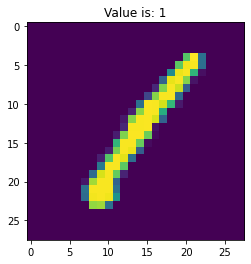

In [6]:
import matplotlib.pyplot as plt

plt.imshow(number[0])
plt.title("Value is: %d" % label[0])

# Model implementation

In [7]:
#train test split

X_train, X_test, y_train, y_test= train_test_split(number, label, test_size=0.2, random_state=42)

In [8]:
# Configuring CNN
img_data_gen=ImageDataGenerator()

model=Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-02-21 06:59:58.349043: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Traditional training with fixed number of epochs - Training and validation happens here
model.fit(X_train, y_train,epochs=50)

2023-02-21 06:59:58.837181: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1050/1050 [==============================] - 12s 11ms/step - loss: 2.2639 - accuracy: 0.2351
Epoch 2/50
1050/1050 [==============================] - 12s 11ms/step - loss: 1.4230 - accuracy: 0.4894
Epoch 3/50
1050/1050 [==============================] - 11s 11ms/step - loss: 0.8464 - accuracy: 0.7261
Epoch 4/50
1050/1050 [==============================] - 11s 10ms/step - loss: 0.6028 - accuracy: 0.8076
Epoch 5/50
1050/1050 [==============================] - 12s 11ms/step - loss: 0.4686 - accuracy: 0.8553
Epoch 6/50
1050/1050 [==============================] - 11s 11ms/step - loss: 0.4177 - accuracy: 0.8726
Epoch 7/50
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3891 - accuracy: 0.8876
Epoch 8/50
1050/1050 [==============================] - 12s 11ms/step - loss: 0.3529 - accuracy: 0.8964
Epoch 9/50
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3250 - accuracy: 0.9018
Epoch 10/50
1050/1050 [==============================] - 12s 11m

# Validating our trained model

In [11]:
# test using validation set
y_pred = model.predict(X_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

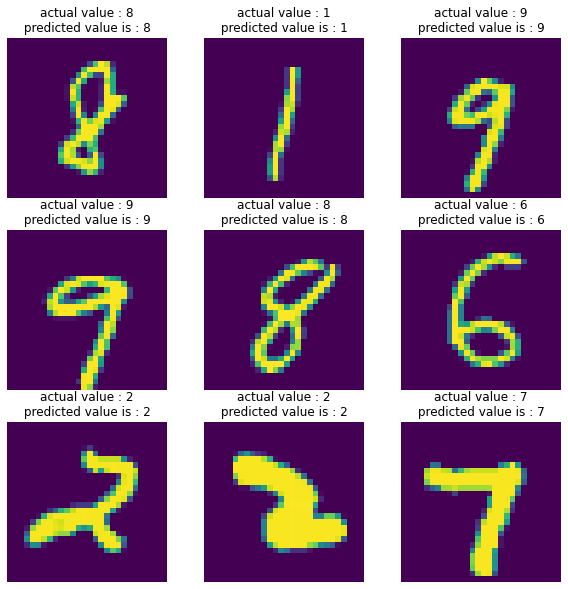

In [12]:
y_list = y_test.to_list()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])

In [13]:
# validation accuracy to see if we're on the right track
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9870238095238095

# Prediction and submission

In [14]:
# Predictions for submission using the test data

df_test = np.array(df_test)
df_test = df_test.reshape(len(df_test),28,28,1)

result = model.predict(df_test)

predicted_val=[]
for i in range(len(result)):
    predicted_val.append(np.argmax(result[i]))

In [15]:
# make a csv for submission
# submission needs two columns, ImageId (1 to len (test dataset)+1) and Label

submission=pd.DataFrame()

imgid=[]
for i in range(1, len(predicted_val)+1):
    imgid.append(i)
    
submission["Imageid"]=imgid
submission["Label"]=predicted_val

In [16]:
submission.head()

,Imageid,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [17]:
submission.to_csv('submission.csv',index=False)